# Ondes mécaniques progressives
## généralités
La connaissance précise des ondes mécaniques permet d’explorer les milieux traversés. Ainsi, les nombreux détecteurs de mouvement de la surface terrestre permettent, à partir de mesures locales, de repérer le passage d’ondes sismiques, mais aussi d’accéder à des informations sur la nature du sol.

Les sons, les ondes d'un séisme, le mouvement d'un fouet, ou la houle à la surface de la mer ont en commun d'être des ondes mécaniques et ont des caractéristiques communes qui sont : 
* la longueur d'onde
* la période d'oscillation du milieu
* la vitesse de propagation dans ce milieu

Ces ondes nécessitent un milieu de propagation pour se propager, ce qui est différent des ondes électromagnetiques (lumière).

## principe
Une onde progressive est créé par la vibration continue et périodique du milieu. Cette perturbation se propage alors de proche en proche.
Le premier programme que nous allons créer va représenter une oscillation régulière du milieu, de forme sinusoidale, à un instant t.

## Partie 1 : courbe sin() à un moment t
On définit au début du programme les 4 variables :

```
A=1        # Amplitude de l'onde
longueurOnde = 600 # la longueur d'onde 
v = 40     # la vitesse de propagation (utile pour la suite)
T = longueurOnde/v # la periode de vibration du milieu, calculée par rapport aux 2 autres
```

On définit également le temps t de propagation de l'onde.

**Avec t = 10 :** (Executer la cellule suivante) 

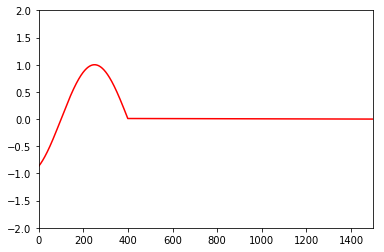

In [11]:
import matplotlib.pyplot as plt
import math
A=1
longueurOnde = 600
v = 40
T = longueurOnde/v # periode d'oscillation
t = 10 # on choisit une valeur arbitraire du temps de propagation(t>0 pour que l'onde ait deja un peu avancé)

x_max = v*t #on calcule l’abscisse de la propagation 
y = [] #on initialise la liste des ordonnées
x = [] #pareil pour les abscisses

for xi in range(0, x_max): # pour chaque valeur des abscisses, entre 0 et x_max
    x.append(xi) # on ajoute xi à la liste des abscisses 
    y.append(A*math.sin((2*3.14/T)*t - (2*3.14/longueurOnde)*xi)) # on calcule l’ordonnée en xi et on ajoute à la liste y  

# on rajoute le point 1500,0 pour afficher un trait où l’onde ne s’est pas encore propagée
x.append(1500) 
y.append(0)
plt.axis([-1, 1500, -2, 2])
plt.plot(x, y, 'r-')
plt.show()

## amélioration du programme
Pour eviter de répéter les blocs de code relatifs aux calculs de x et y, on définit une fonction `coordo(A,longueurOnde,v,t)`.
Cette fonction retourne les listes `x`et `y` à un instant t de la propagation de l'onde, en fonction des paramètres `A`, `longueurOnde` , `v` et `t` : 

**Executer la cellule suivante :**

In [ ]:
def coordo(A,longueurOnde, v, t):
    x_max = v*t
    T = longueurOnde/v

    for xi in range(0, x_max):
        x.append(xi) # on ajoute xi à la liste des abscisses 
        y.append(A*math.sin((2*3.14/T)*t - (2*3.14/longueurOnde)*xi)) # dans la ligne précédente, on calcule l’ordonnée en xi   
    x.append(1500) 
    y.append(0)
    return x,y

x = []
y = []
x,y = coordo(1,600,40,10) # ligne à modifier selon les paramètres voulus
plt.axis([-1, 1500, -2, 2])
plt.plot(x, y, 'r-')
plt.show()

## Modifier les paramètres de la courbe

Revenir au programme de la cellule précédente, et modifier l\'appel de fonction : 

* Remplacer la valeur du temps `t` par 20 : 
la ligne `x,y = coordo(1,600,40,10)` sera à remplacer par `x,y = coordo(1,600,40,20)` 

> Que remarquez vous ?

* Faire un autre essai avec une valeur de `t` encore plus importante (par exemple 30 puis 50).

> Que remarquez vous ?

* Modifier maintenant la valeur de l'amplitude. En mettant par exemple une amplitude égale à 2 lors de l'appel de la fonction

> Que remarquez vous ?

* Modifier enfin la valeur de la longueur d'onde. Mettre par exemple la valeur à 300, ou 900.

> Que remarquez vous ?

Maintenant, nous allons modifier ce programme pour que la courbe soit tracée plusieurs fois, mais à chaque fois, avec des points dont les coordonnées sont recalculées.
Le paramètre temps `t` sera modifié. On utilise une boucle bornée pour répéter les instructions de tracé du graphique: `for t in range(0,20,4):`
Les coordonnées sont alors remises à jour à chaque itération avec `x,y = coordo(1,600,40,t)`.

Comme la liste des valeurs de `y` depend du temps `t` (voir la definition de la fonction `coordo()`, cela donnera l'illusion d'un déplacement de la courbe, comme la propagation d'une onde : 

In [ ]:
#import matplotlib.pyplot as plt
for t in range(0,40,4): #le temps va évoluer de 0 à 40 avec un pas de 4 (0, 4, 8, 12, ...)
    x = []
    y = []
    x,y = coordo(1,600,40,t)
    plt.axis([-1, 1500, -2, 2])
    plt.plot(x, y, 'r-')
    plt.show()

## Partie 2 : Une vraie animation
Executer enfin la cellule suivante. 
Puis modifier les paramètres de l'onde et observer les modifications sur la propagation.
*(0.2<A<2 ; 10<v<60 ; 300<longueurOnde<900)*

> Comment obtient-on une onde :
* de plus grande/faible amplitude 
* plus rapide/lente
* de plus longue/courte longueur d'onde
* de plus grande/courte fréquence de vibration

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

#----------- parametres de l'onde -------------
A = 1
longueurOnde = 600
v = 40
T = longueurOnde/v 
#----------------------------------------------

x = np.linspace(0,1500)
fig, ax = plt.subplots()
ax.axis([0,1500,-2,2])
l, = ax.plot([],[])

def animate(i):
    phi = (2*3.14/T)*i - (2*3.14/longueurOnde)*x
    y = np.sin(phi)
    l.set_data(x, y)

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(x))

from IPython.display import HTML
HTML(ani.to_jshtml())